In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import umap
import sys

sys.path.insert(0, "..")

from src.utils import load_mammoth_data
from src.laplacian_eigenmaps import LaplacianEigenmaps

In [2]:
data_raw = load_mammoth_data()
print(data_raw.shape)
# Remove 95% of the points in the dataset randomly
n = len(data_raw) * 0.05

# Create vector of random indices
random_indices = np.random.choice(len(data_raw), size=int(n), replace=False)
data = data_raw[random_indices]
print(data.shape)

Loading Mammoth 3D dataset...
Data shape: (999778, 3)
(999778, 3)
(49988, 3)


Visualization of the dataset

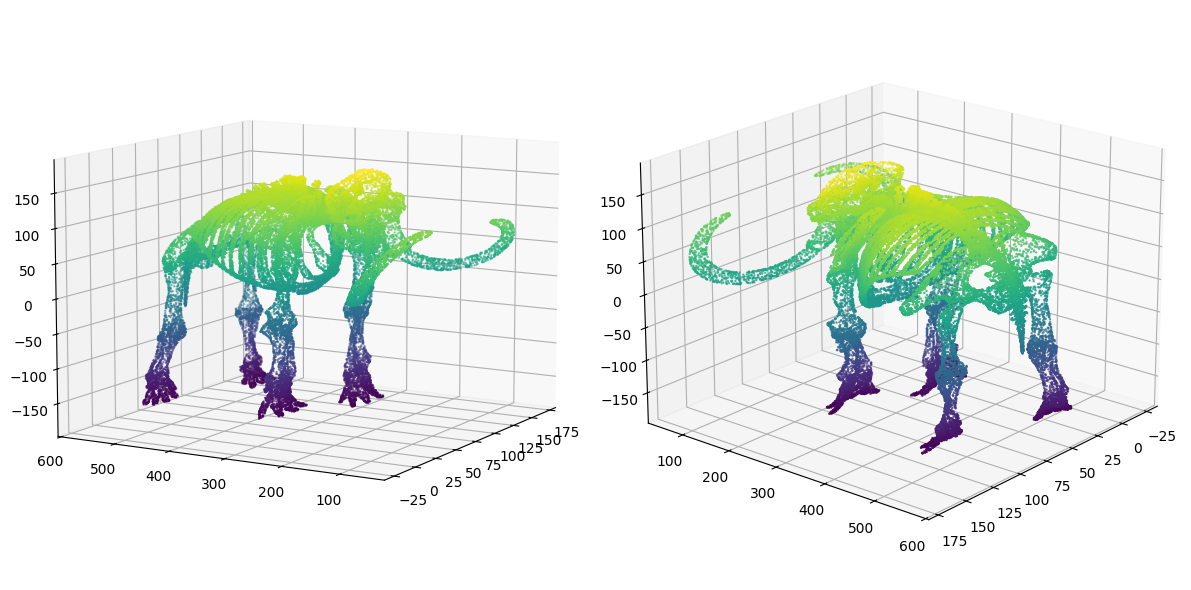

In [16]:
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
sc1 = ax1.scatter(data[:, 0], data[:, 1], data[:, 2], c=data[:, 2], cmap='viridis', s=0.5)
ax1.view_init(elev=10, azim=210)

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
sc2 = ax2.scatter(data[:, 0], data[:, 1], data[:, 2], c=data[:, 2], cmap='viridis', s=0.5)
ax2.view_init(elev=20, azim=40)

plt.tight_layout()
plt.show()

In [ ]:
reducer_spectral = umap.UMAP(
    n_neighbors=30,
    min_dist=0.1,
    n_components=2,
    init='spectral',
)
embedding_spectral = reducer_spectral.fit_transform(data)

In [ ]:
reducer_random = umap.UMAP(
    n_neighbors=30,
    min_dist=0.1,
    n_components=2,
    init='random',
)
embedding_random = reducer_random.fit_transform(data)

In [ ]:
colors = data[:, 2] # Color by Z-axis value

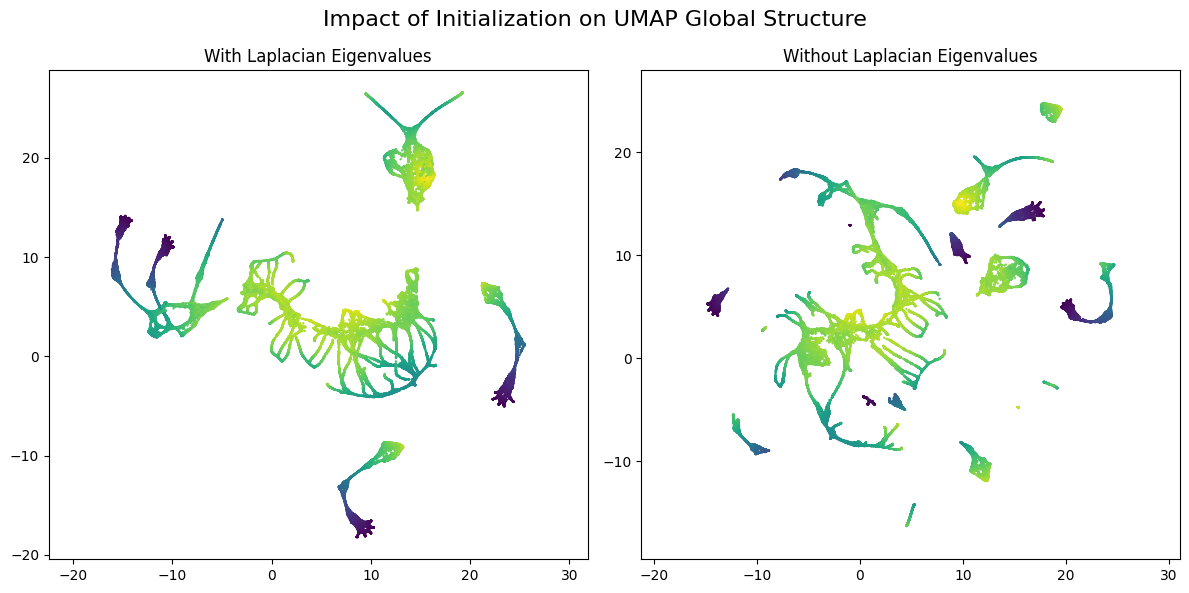

In [ ]:
fig = plt.figure(figsize=(12, 6))
fig.suptitle("Impact of Initialization on UMAP Global Structure", fontsize=16)

ax2 = fig.add_subplot(121)
ax2.scatter(embedding_spectral[:, 0], embedding_spectral[:, 1], c=colors, cmap='viridis', s=0.5)
ax2.set_title("With Laplacian Eigenvalues", fontsize=12)
ax2.set_aspect('equal', 'datalim')

# Plot C: Random Initialization
ax3 = fig.add_subplot(122)
ax3.scatter(embedding_random[:, 0], embedding_random[:, 1], c=colors, cmap='viridis', s=0.5)
ax3.set_title("Without Laplacian Eigenvalues", fontsize=12)
ax3.set_aspect('equal', 'datalim')
plt.tight_layout()
plt.show()

Es importante anotar que este proceso no permite introducir nuevos puntos en el espacio reducido una vez que ya hemos realizado la reducción de dimensionalidad, porque para ello tenemos que recalcular toda la estructura del grafo de vecinos más cercanos.